# Understanding Band Data

In [1]:
import numpy as np
import json
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

Let's load a file and see the keys

In [2]:
example = "../FULL_MATPEDIA_DATA/bands/2dm-2004.json"
bands_dict=json.load(open(example))

for key in bands_dict:
    print(key)

is_spin_polarized
branches
kpoints
is_metal
vbm
@module
efermi
labels_dict
@class
lattice_rec
bands
band_gap
cbm
structure
projections


## Understanding The K-Space
The third K-space coordinate always equals zero, as we are in 2D.

In [3]:
bands_dict["labels_dict"]

{'\\Gamma': [-0.0, 0.0, 0.0],
 'K': [0.33333333, 0.33333333, 0.0],
 'M': [0.5, 0.0, 0.0]}

In [4]:
bands_dict["branches"]

[{'name': '\\Gamma-K', 'start_index': 0, 'end_index': 20},
 {'name': 'K-M', 'start_index': 21, 'end_index': 41},
 {'name': 'M-\\Gamma', 'start_index': 42, 'end_index': 62}]

In [5]:
bands_dict["kpoints"][0: 21]

[[0.0, 0.0, 0.0],
 [0.01666667, 0.01666667, 0.0],
 [0.03333333, 0.03333333, 0.0],
 [0.05, 0.05, 0.0],
 [0.06666667, 0.06666667, 0.0],
 [0.08333333, 0.08333333, 0.0],
 [0.1, 0.1, 0.0],
 [0.11666667, 0.11666667, 0.0],
 [0.13333333, 0.13333333, 0.0],
 [0.15, 0.15, 0.0],
 [0.16666667, 0.16666667, 0.0],
 [0.18333333, 0.18333333, 0.0],
 [0.2, 0.2, 0.0],
 [0.21666667, 0.21666667, 0.0],
 [0.23333333, 0.23333333, 0.0],
 [0.25, 0.25, 0.0],
 [0.26666667, 0.26666667, 0.0],
 [0.28333333, 0.28333333, 0.0],
 [0.3, 0.3, 0.0],
 [0.31666667, 0.31666667, 0.0],
 [0.33333333, 0.33333333, 0.0]]

## Understanding the Band Structures
Each row doesn't correspond with a band necessarily!

In [55]:
bands = np.array(bands_dict["bands"]["1"])
bands

array([[-35.3944, -35.3943, -35.3943, ..., -35.3943, -35.3943, -35.3944],
       [-19.3449, -19.3451, -19.3457, ..., -19.3455, -19.3451, -19.3449],
       [-19.1283, -19.1381, -19.1595, ..., -19.153 , -19.1358, -19.1283],
       ...,
       [  5.2997,   5.4495,   5.6724, ...,   5.5807,   5.4188,   5.2997],
       [  5.6043,   5.6317,   5.7176, ...,   5.6953,   5.6251,   5.6043],
       [  5.6313,   5.6564,   5.7624, ...,   5.6979,   5.6507,   5.6313]])

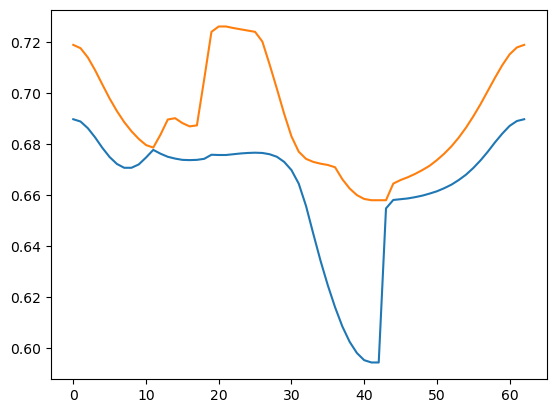

In [26]:
plt.plot(bands[29]-bands_dict["efermi"])
plt.plot(bands[30]-bands_dict["efermi"])

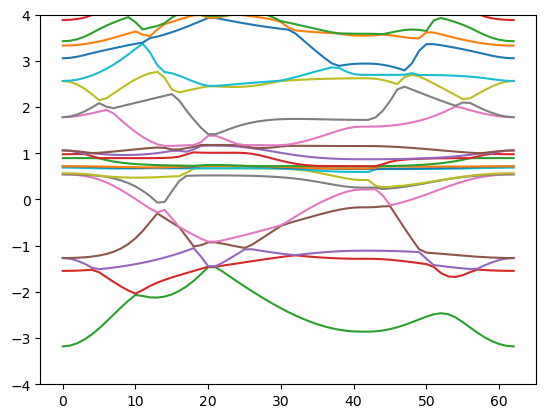

In [56]:
fig, ax = plt.subplots()
ax.set_ylim([-4, 4])
for band in bands:
    ax.plot(band-bands_dict["efermi"])

In [74]:
def calc_gamma_fingerprint(bands_dict):
    band_energies = np.array(bands_dict["bands"]["1"]) - bands_dict["efermi"]
    band_energies_gamma = band_energies[:, 0]
    counts, edges = np.histogram(band_energies_gamma, bins=32, range=[-4, 4])
    density = counts / len(band_energies_gamma)
    return density
    

In [77]:
calc_gamma_fingerprint(bands_dict)

array([0.        , 0.        , 0.        , 0.01666667, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.01666667,
       0.03333333, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.1       , 0.03333333,
       0.03333333, 0.        , 0.        , 0.03333333, 0.        ,
       0.        , 0.03333333, 0.        , 0.01666667, 0.03333333,
       0.        , 0.01666667])